# Import libraries

In [ ]:
from keras import layers, models, optimizers, callbacks, regularizers
from source_codes.ranking_model_prob import create_meta_network
from source_codes.ranking_model_ranksvm import ranking_alone_model_hp
from keras.utils import plot_model

# Prepare data

# Redefine model for hyperparameters tuning

# Tune hyperparameters

# Display tuning results

In [ ]:
# ----------------------------------------------- model training ----------------------------------------------- #
from keras import layers, models, optimizers, callbacks, regularizers
from source_codes.ranking_models_hptunable import ranking_alone_model_hp
from keras.utils import plot_model
import os

# load model
model = ranking_alone_model_hp(
    # feature extraction
    backbone='vgg19',
    backbone_weights='imagenet',
    # subnetwork
    r_num_dense=4,
    r_dense_dropout=True,
    r_dense_units=3072,
    r_sub_dense_mode="parallel",
    r_dense_dropout_rate=0.15,
    r_l1=1e-4,
    r_l2=1e-5,
    # compilation
    optimizer='adam',
    decay=1e-7,
    learning_rate=1e-6,
)

# model = models.load_model("model_training/Q1/hp_tuning/hptuning_ranking_230430/best_model_0_architecture.h5")

# load the weights
# model.load_weights("final_models/Q1/Q1_bestmodel0_hp230421_drop0.5_epoch100/feature_extraction_weights_vgg19.h5",by_name=True,skip_mismatch=True)

model.summary()
plot_model(model,show_shapes=True)

In [8]:
# prepare data
import numpy as np
import os

question_index = str(1)

# training data
x_left_training = np.load(os.path.join('data/datasets/train_data/draw_exclude/train_left_duel_' + question_index + '.npy'), allow_pickle=True)
x_right_training = np.load(os.path.join('data/datasets/train_data/draw_exclude/train_right_duel_' + question_index + '.npy'), allow_pickle=True)
y_training = np.load(os.path.join('data/datasets/train_data/draw_exclude/train_label_duel_' + question_index + '.npy'), allow_pickle=True)

# validation data
x_left_val = np.load(os.path.join('data/datasets/validation_data/draw_exclude/val_left_duel_' + question_index + '.npy'), allow_pickle=True)
x_right_val = np.load(os.path.join('data/datasets/validation_data/draw_exclude/val_right_duel_' + question_index + '.npy'), allow_pickle=True)
y_val = np.load(os.path.join('data/datasets/validation_data/draw_exclude/val_label_duel_' + question_index + '.npy'), allow_pickle=True)

# test data
x_left_test = np.load(os.path.join('data/datasets/test_data/draw_exclude/test_left_duel_' + question_index + '.npy'), allow_pickle=True)
x_right_test = np.load(os.path.join('data/datasets/test_data/draw_exclude/test_right_duel_' + question_index + '.npy'), allow_pickle=True)
y_test = np.load(os.path.join('data/datasets/test_data/draw_exclude/test_label_duel_' + question_index + '.npy'), allow_pickle=True)

In [9]:
# train the best model 0
from keras import callbacks

save_model_results = "model_training/Q1/ranking_using_imagenet_weights"

checkpoint = callbacks.ModelCheckpoint(
    os.path.join(save_model_results, 'best_model_weights.h5'),
    save_best_only=True,
    save_weights_only=True,
    monitor="val_ranking_accuracy",
    mode='max',
    verbose=1)

early_stopping = callbacks.EarlyStopping(monitor="val_loss",
                                         patience=10,
                                         mode='min',
                                         verbose=1)

history = model.fit(
    x=[x_left_training, x_right_training],
    y=y_training,
    epochs=50,
    batch_size=16,
    validation_data=([x_left_val,x_right_val],y_val),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
(None, 2) (None, 2)
(None, 2) (None, 2)
172/172 [==============================] - ETA: 0s - loss: 244.6952 - ranking_accuracy: 0.5694(None, 2) (None, 2)

Epoch 1: val_ranking_accuracy improved from -inf to 0.66703, saving model to model_training/Q1/ranking_using_imagenet_weights\best_model_weights.h5
172/172 [==============================] - 43s 199ms/step - loss: 244.6952 - ranking_accuracy: 0.5694 - val_loss: 38.2172 - val_ranking_accuracy: 0.6670
Epoch 2/50
172/172 [==============================] - ETA: 0s - loss: 141.4785 - ranking_accuracy: 0.6254
Epoch 2: val_ranking_accuracy improved from 0.66703 to 0.71444, saving model to model_training/Q1/ranking_using_imagenet_weights\best_model_weights.h5
172/172 [==============================] - 33s 190ms/step - loss: 141.4785 - ranking_accuracy: 0.6254 - val_loss: 29.2258 - val_ranking_accuracy: 0.7144
Epoch 3/50
172/172 [==============================] - ETA: 0s - loss: 100.4075 - ranking_accuracy: 0.6562
Epoch 3: val_rank

AttributeError: 'NoneType' object has no attribute 'write'

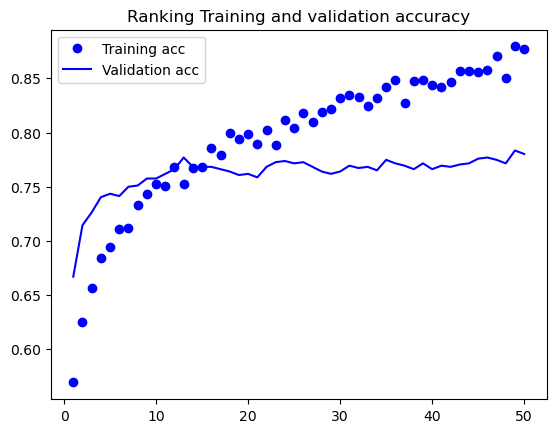

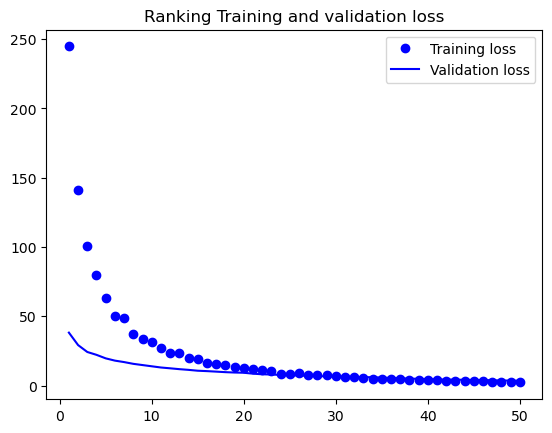

In [11]:
import pickle
import os
from source_codes.utils import plot_model_accuracy, plot_model_loss, save_structure_in_json,plot_model_metrics
import matplotlib.pyplot as plt

folder_path = save_model_results
model_history = history

# Save training history
with open(os.path.join(folder_path, 'history.pickle'), 'wb') as f:
    pickle.dump(model_history.history, f)

# # Comparison Accuracy
# com_acc = model.history.history['Comparison_Output_accuracy']
# val_com_acc = model.history.history['val_Comparison_Output_accuracy']
# epochs = range(1, len(com_acc) + 1)
#
# # Configuring plot
# plt.figure()
# plt.plot(epochs, com_acc, 'bo', label='Training acc')
# plt.plot(epochs, val_com_acc, 'b', label='Validation acc')
# plt.title('Comparison Training and validation accuracy')
# plt.legend()
#
# # Comparison Loss
# com_loss = model.history.history['Comparison_Output_loss']
# val_com_loss = model.history.history['val_Comparison_Output_loss']
# epochs = range(1, len(com_loss) + 1)
#
# # Configuring plot
# plt.figure()
# plt.plot(epochs, com_loss, 'bo', label='Training loss')
# plt.plot(epochs, val_com_loss, 'b', label='Validation loss')
# plt.title('Comparison Training and validation loss')
# plt.legend()

# Ranking Accuracy
rank_acc = model.history.history['ranking_accuracy']
val_rank_acc = model.history.history['val_ranking_accuracy']
epochs = range(1, len(rank_acc) + 1)

# Configuring plot
plt.figure()
plt.plot(epochs, rank_acc, 'bo', label='Training acc')
plt.plot(epochs, val_rank_acc, 'b', label='Validation acc')
plt.title('Ranking Training and validation accuracy')
plt.legend()
plt.savefig(os.path.join(folder_path,'ranking_acc.png'))

# Ranking Loss
rank_loss = model.history.history['loss']
val_rank_loss = model.history.history['val_loss']
epochs = range(1, len(rank_loss) + 1)

# Configuring plot
plt.figure()
plt.plot(epochs, rank_loss, 'bo', label='Training loss')
plt.plot(epochs, val_rank_loss, 'b', label='Validation loss')
plt.title('Ranking Training and validation loss')
plt.legend()
plt.savefig(plt.savefig(os.path.join(folder_path,'ranking_loss.png')))

In [12]:
# test model
model.evaluate([x_left_test,x_right_test],y_test)


29/29 [==============================] - 6s 183ms/step - loss: 6.7867 - ranking_accuracy: 0.7827


[6.7867255210876465, 0.782707929611206]

In [13]:
# save model
model.save(os.path.join(save_model_results,'q1_ranking_model_using_imagenet_weight.h5'))

In [18]:
model.summary()

Model: "Ranking_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg19 (Functional)             (None, 7, 7, 512)    20024384    ['input_2[0][0]',                
                                                                  'input_3[0][0]']    

<KerasTensor: shape=(2,) dtype=float32 (created by layer 'tf.__operators__.getitem_3')>

In [51]:
# Predict using the weights
from keras import Model
# build a single input ranking model
new_model = ranking_alone_model_hp(
    backbone='vgg19',
    backbone_weights='imagenet',

    r_num_dense=4,
    r_dense_dropout=True,
    r_dense_units=3072,
    r_sub_dense_mode="parallel",
    r_dense_dropout_rate=0.15,
    r_l1=1e-4,
    r_l2=1e-5,

    optimizer='adam',
    decay=1e-7,
    learning_rate=1e-6,
)

new_model.load_weights("model_training/Q1/ranking_using_comparison_weights_2/best_model_weights.h5")
new_model.summary()

Model: "Ranking_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg19 (Functional)             (None, 7, 7, 512)    20024384    ['input_14[0][0]',               
                                                                  'input_15[0][0]']   

In [52]:
# extract backbone
feature_extraction_layers = new_model.get_layer('vgg19')
feature_extraction_layers.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
# extract subnetwork
subnetwork_layers = new_model.get_layer('Ranking_Subnetwork')
subnetwork_layers.summary()

Model: "Ranking_Subnetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ranking_Dense_1 (Dense)     (None, 3072)              77073408  
                                                                 
 Ranking_DenseDrop_1 (Dropou  (None, 3072)             0         
 t)                                                              
                                                                 
 Ranking_Dense_2 (Dense)     (None, 1536)              4720128   
                                                                 
 Ranking_DenseDrop_2 (Dropou  (None, 1536)             0         
 t)                                                              
                                                                 
 Ranking_Dense_3 (Dense)     (None, 768)               1180416   
                                                                 
 Ranking_DenseDrop_3 (Dropou  (None, 768)       

In [54]:
from keras import Model
# combine the extracted backbone and subnetwork
single_input = layers.Input(shape=(224, 224, 3), name='image')
vgg_output = feature_extraction_layers(single_input)
flattened = layers.Flatten(name='flatten')(vgg_output)
subnetwork_output = subnetwork_layers(flattened)
single_input_model = Model(inputs=single_input, outputs=subnetwork_output)
single_input_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 Ranking_Subnetwork (Sequent  (None, 1)                83269633  
 ial)                                                            
                                                                 
Total params: 103,294,017
Trainable params: 90,349,057
Non-trainable params: 12,944,960
_________________________________________________________________


In [55]:
# Use single input model to predict
from PIL import Image
import tensorflow as tf

prediction_results = np.empty((0,3),dtype=float)
i = 0
img_folder = "data/datasets/ForPrediction"
for folder_name in os.listdir(img_folder):
    folder_path = os.path.join(img_folder, folder_name)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # load the file here
        img = Image.open(file_path)
        img = img.resize((224,224),resample=Image.BICUBIC)
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
        img_tensor = np.expand_dims(np.array(img_tensor), axis=0)
        print(img_tensor.shape)
        # predict
        score_pred = single_input_model.predict(img_tensor)[0]
        # stack to np np array
        img_coords = folder_name.split(',')
        pred_row = np.array([img_coords[0],img_coords[1],float(score_pred)])
        i = i+1
        print(i,pred_row)
        prediction_results = np.vstack((prediction_results,pred_row))

np.savetxt('prediction_results_ranking_using_comparison_weights.csv', prediction_results.astype(float), delimiter=',', header='lon,lat,score', comments='')

C:\Users\zhewen\AppData\Local\Temp\ipykernel_12964\2156549577.py:14: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img = img.resize((224,224),resample=Image.BICUBIC)


(1, 224, 224, 3)
1/1 [==============================] - 1s 572ms/step
1 ['44.96640658746155' '-75.82486739008041' '1.5546882152557373']
(1, 224, 224, 3)
1/1 [==============================] - 0s 177ms/step
2 ['44.9722843071082' '-75.82188979624586' '1.0989365577697754']
(1, 224, 224, 3)
1/1 [==============================] - 0s 164ms/step
3 ['44.98302989012674' '-75.80043092565874' '1.2129786014556885']
(1, 224, 224, 3)
1/1 [==============================] - 0s 157ms/step
4 ['44.98333378903533' '-75.79915143839494' '2.5210916996002197']
(1, 224, 224, 3)
1/1 [==============================] - 0s 173ms/step
5 ['44.98341202599965' '-75.79795296724956' '1.5779879093170166']
(1, 224, 224, 3)
1/1 [==============================] - 0s 165ms/step
6 ['44.98362276421967' '-75.8009001314351' '1.5572123527526855']
(1, 224, 224, 3)
1/1 [==============================] - 0s 164ms/step
7 ['44.98501987101103' '-75.80134628890305' '1.2396700382232666']
(1, 224, 224, 3)
1/1 [============================